# **Classification Excercise Problems**

## Problem 1: Training the model with accurancy more than 85% from sklearn make moon


### Import statements

In [40]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Data Generation


In [42]:
moon_data = make_moons(n_samples=1000, noise=0.1);

X_train, X_test, y_train, y_test = train_test_split(moon_data[0], moon_data[1], test_size=0.2, random_state=42);

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [43]:
X_train[0].shape, X_test[0].shape, y_train.shape, y_test.shape

((2,), (2,), (800,), (200,))

In [44]:
X_train, y_train

(array([[ 2.06622259,  0.46270221],
        [-0.94256886,  0.36168569],
        [-0.80913597,  0.40227845],
        ...,
        [ 1.70542216, -0.02811471],
        [ 1.94870355,  0.23185779],
        [ 0.18080459, -0.22693263]]),
 array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
        1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
        0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
        0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
        1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
        0, 0, 0, 1, 0, 0, 1, 

### Data Preprocessing

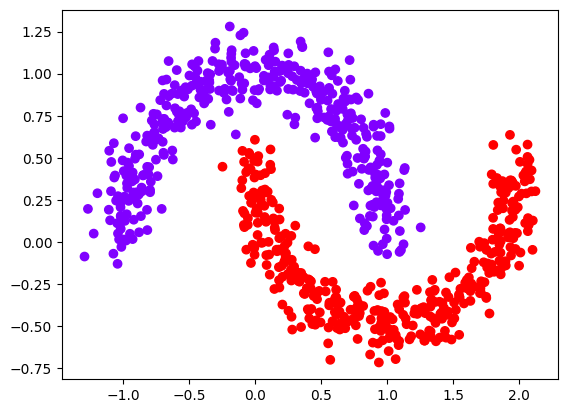

In [45]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='rainbow')
plt.show()

In [46]:
X_train[0], y_train[0]

(array([2.06622259, 0.46270221]), 1)

In [47]:
x_min = X_train.min()
x_max = X_train.max()

x_min, x_max

(-1.2946785506498724, 2.125617617325377)

In [48]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train[0], y_train[0]

(array([0.98263454, 0.59046192]), 1)

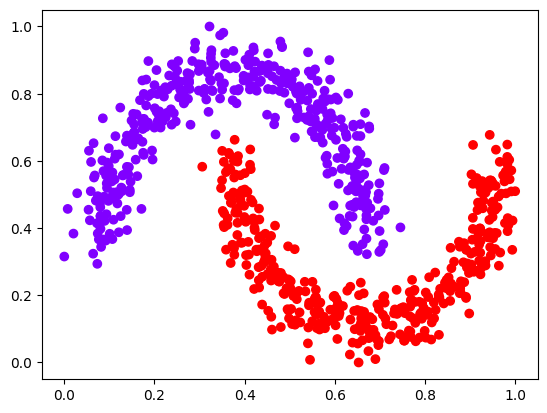

In [49]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='rainbow')
plt.show()

### Train Model and Experiments

In [50]:
tf.random.set_seed(42);

# create the model

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# conpile the model

lr_schedulers = [
    tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch / 20))
]

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy']);

# fit the model
model_1_history = model_1.fit(X_train, y_train, epochs=202, callbacks=lr_schedulers);
model_1.summary()

Epoch 1/202
25/25 [==============================] - 1s 2ms/step - loss: 0.6904 - accuracy: 0.4950 - lr: 1.0000e-04
Epoch 2/202
25/25 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.4950 - lr: 1.1220e-04
Epoch 3/202
25/25 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5288 - lr: 1.2589e-04
Epoch 4/202
25/25 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.6162 - lr: 1.4125e-04
Epoch 5/202
25/25 [==============================] - 0s 2ms/step - loss: 0.6815 - accuracy: 0.7088 - lr: 1.5849e-04
Epoch 6/202
25/25 [==============================] - 0s 2ms/step - loss: 0.6771 - accuracy: 0.7425 - lr: 1.7783e-04
Epoch 7/202
25/25 [==============================] - 0s 2ms/step - loss: 0.6714 - accuracy: 0.7688 - lr: 1.9953e-04
Epoch 8/202
25/25 [==============================] - 0s 2ms/step - loss: 0.6650 - accuracy: 0.8087 - lr: 2.2387e-04
Epoch 9/202
25/25 [==============================] - 0s 2ms/step - loss:

In [51]:
model_1.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 67073.5156 - accuracy: 0.4800


[67073.515625, 0.47999998927116394]

Text(0.5, 0, 'epochs')

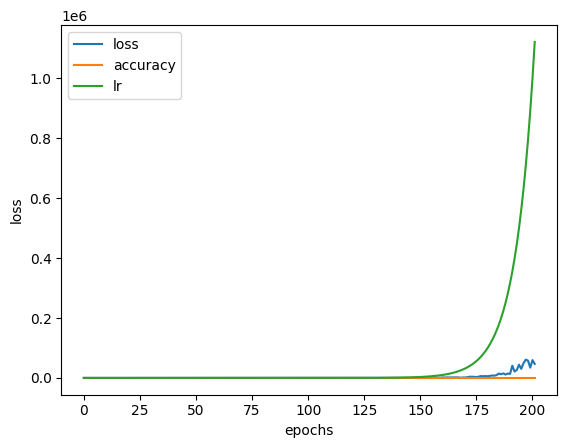

In [52]:
pd.DataFrame(model_1_history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

Text(0, 0.5, 'Loss')

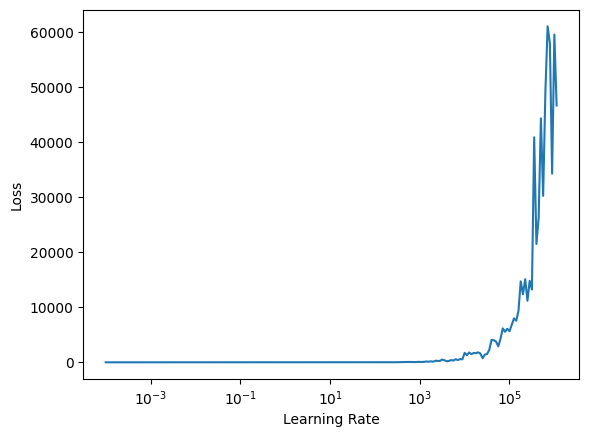

In [53]:
lrs = 1e-4 * (10 ** (np.arange(202) / 20))
plt.semilogx(lrs, model_1_history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')

### Model Training with new Hyper Parameter

In [54]:
tf.random.set_seed(42);

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')]);


model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy']);


model_2_history = model_2.fit(X_train, y_train, epochs=200, verbose=0);

model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (32, 6)                   18        
                                                                 
 dense_25 (Dense)            (32, 6)                   42        
                                                                 
 dense_26 (Dense)            (32, 6)                   42        
                                                                 
 dense_27 (Dense)            (32, 6)                   42        
                                                                 
 dense_28 (Dense)            (32, 6)                   42        
                                                                 
 dense_29 (Dense)            (32, 1)                   7         
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 

In [55]:
model_2.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.2374 - accuracy: 0.9000


[0.23744070529937744, 0.8999999761581421]

### Visualize the decision boundary

In [56]:
def plot_decision_boundary(model,X,y):
  """
    Plots the decision boundary created by a model predicting X.
  """

  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1;
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1;

  xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100));

  x_in = np.c_[xx.ravel(),yy.ravel()];

  print(x_in);

  y_pred = model.predict(x_in);

  if len(y_pred[0]) > 1:
    print("doing multiclass classification");
    y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape);
  else:
    print("doing binary classification");
    y_pred = np.round(y_pred).reshape(xx.shape);


  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7);
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu);
  plt.xlim(xx.min(),xx.max());
  plt.ylim(yy.min(),yy.max());

  plt.show();

Text(0.5, 0, 'epochs')

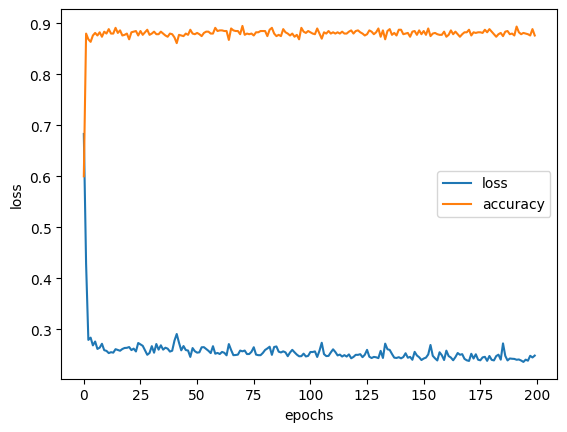

In [57]:
pd.DataFrame(model_2_history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

[[-0.1        -0.1       ]
 [-0.08787879 -0.1       ]
 [-0.07575758 -0.1       ]
 ...
 [ 1.07575758  1.1       ]
 [ 1.08787879  1.1       ]
 [ 1.1         1.1       ]]
313/313 [==============================] - 1s 3ms/step
doing binary classification


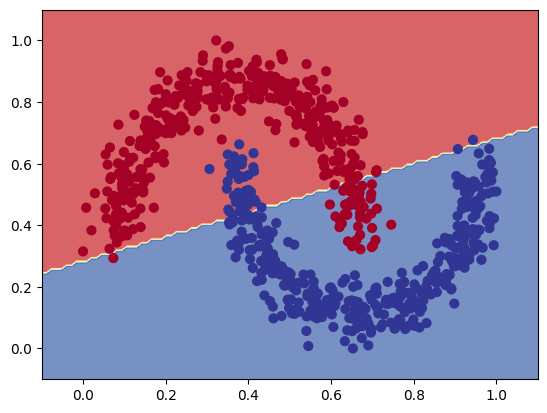

In [58]:
plot_decision_boundary(model_2,X_train,y_train);

[[-0.02438472 -0.08504178]
 [-0.01339092 -0.08504178]
 [-0.00239712 -0.08504178]
 ...
 [ 1.04201378  1.06083614]
 [ 1.05300758  1.06083614]
 [ 1.06400138  1.06083614]]
313/313 [==============================] - 1s 2ms/step
doing binary classification


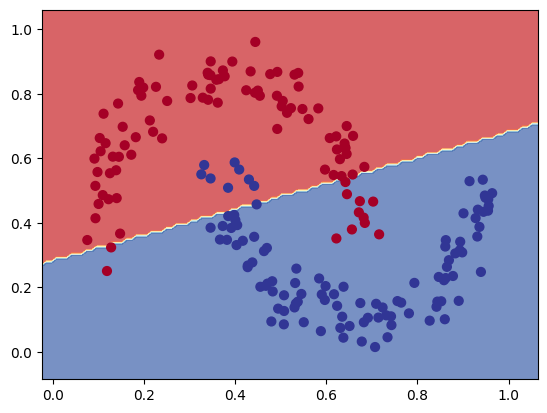

In [59]:
plot_decision_boundary(model_2,X_test,y_test);

### Plot Confusion Matrix

In [62]:
cm = confusion_matrix(y_test, tf.round(model_2.predict(X_test)))

cm

7/7 [==============================] - 0s 5ms/step


array([[84, 12],
       [ 8, 96]])

In [64]:
import seaborn as sns

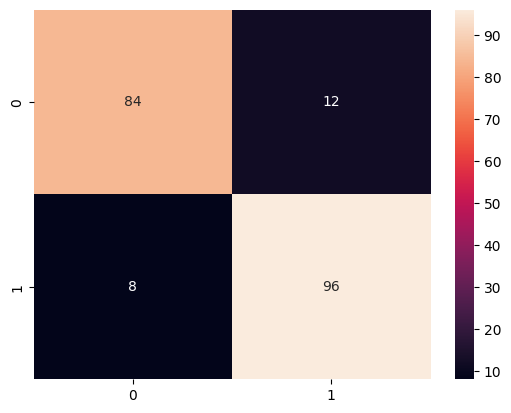

In [65]:
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

## Problem 2: Tensorflow Fashion Dataset Training

### Data Generation

In [67]:
from tensorflow.keras.datasets import fashion_mnist

In [68]:
X_train_full, y_train_full = fashion_mnist.load_data()[0]
X_test, y_test = fashion_mnist.load_data()[1]

In [69]:
X_train_full.shape, y_train_full.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### Data Visulization

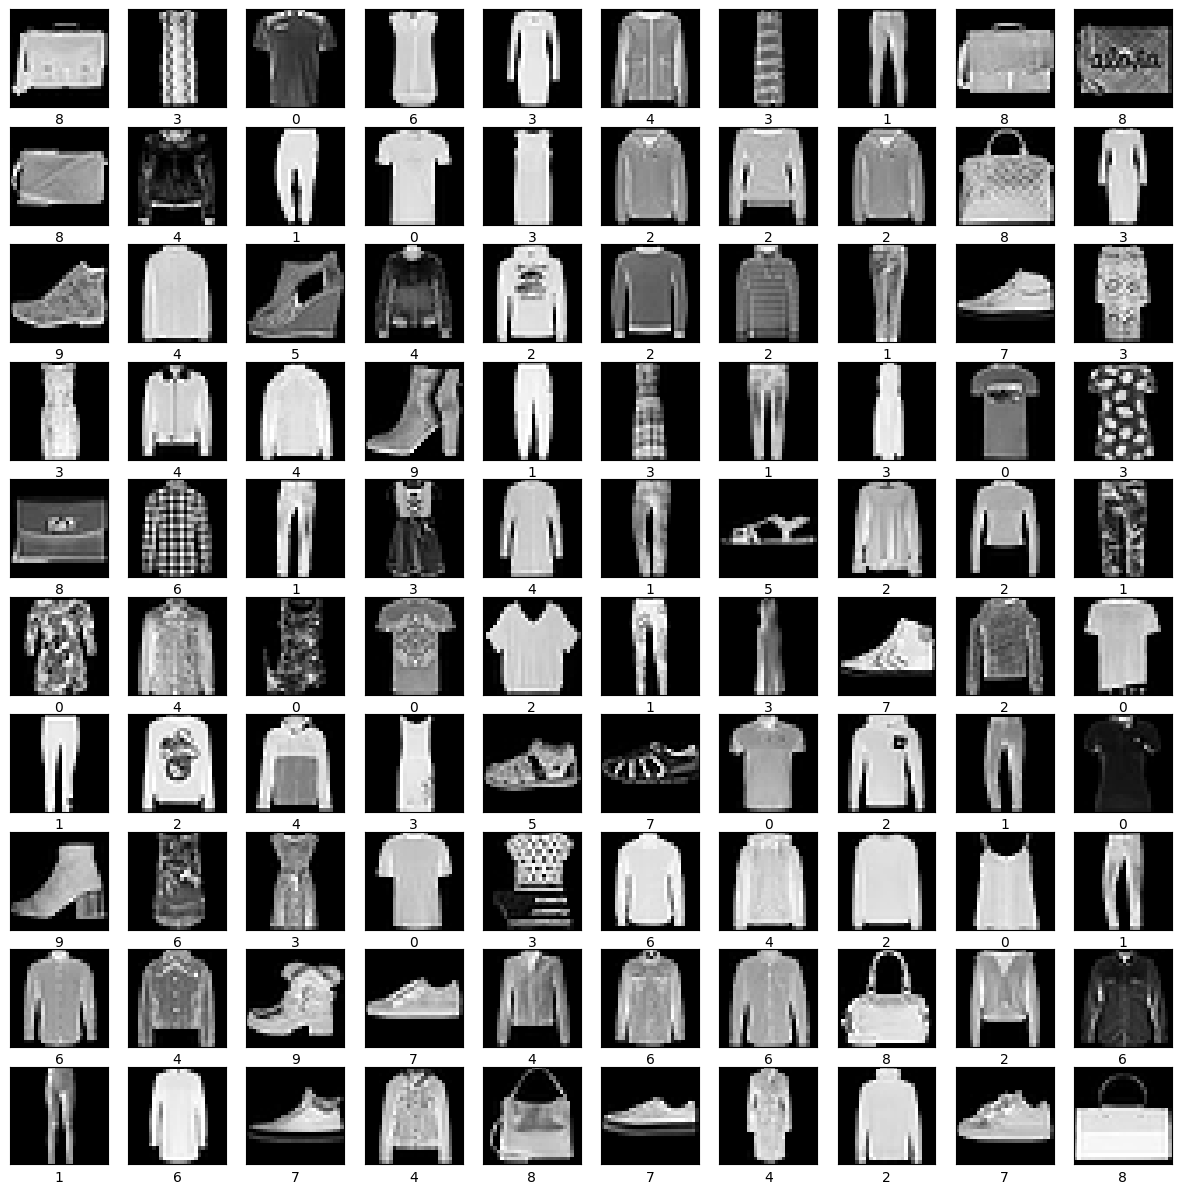

In [80]:
plt.figure(figsize=(15,15))
for i in range(100):
  idx = np.random.randint(0, X_train_full.shape[0]);
  plt.subplot(10,10,i+1);
  plt.xticks([]);
  plt.yticks([]);
  plt.grid(False);
  plt.imshow(X_train_full[idx], cmap='gray');
  plt.xlabel(y_train_full[idx]);
  # plt.show();
  # print(y_train_full[idx]);




### Data Preprocessing

In [82]:
x_max = X_train_full.max()
x_min = X_train_full.min()

x_max, x_min

(255, 0)

In [83]:
X_train_scaled = X_train_full / x_max
X_test_scaled = X_test / x_max

In [85]:
X_train_scaled[0], y_train_full[0]

(array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [86]:
X_train_scaled.shape, y_train_full.shape, X_test_scaled.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### Model Traning

In [88]:
tf.random.set_seed(42);

# create model

model_fnt_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


# compile model

model_fnt_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['accuracy'])

# train the model

model_fnt_1_history = model_fnt_1.fit(X_train_scaled, y_train_full, epochs=30);

# print summary
model_fnt_1.summary()

Epoch 1/30
1875/1875 [==============================] - 22s 11ms/step - loss: 0.5068 - accuracy: 0.8166
Epoch 2/30
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3832 - accuracy: 0.8598
Epoch 3/30
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3444 - accuracy: 0.8744
Epoch 4/30
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3243 - accuracy: 0.8820
Epoch 5/30
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3019 - accuracy: 0.8883
Epoch 6/30
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2889 - accuracy: 0.8935
Epoch 7/30
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2785 - accuracy: 0.8971
Epoch 8/30
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2688 - accuracy: 0.9008
Epoch 9/30
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2539 - accuracy: 0.9050
Epoch 10/30
1875/1875 [==============================] - 20s 11m

In [90]:
model_fnt_1.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.4445 - accuracy: 0.8881


[0.444477915763855, 0.8881000280380249]

Text(0.5, 0, 'epochs')

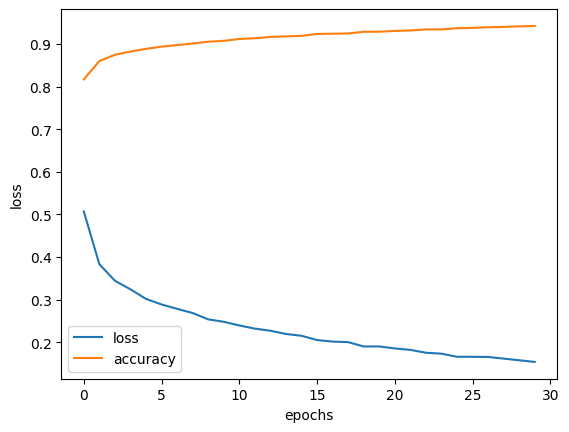

In [91]:
pd.DataFrame(model_fnt_1_history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

### Visualize Confusion Matrix

In [98]:

y_preds = tf.argmax(model_fnt_1.predict(X_test_scaled), axis=1)
y_preds
cm = confusion_matrix(y_test, y_preds)
cm

# cm


313/313 [==============================] - 1s 4ms/step


array([[924,   1,  15,  15,   3,   1,  36,   0,   5,   0],
       [  5, 961,   2,  25,   4,   0,   2,   0,   1,   0],
       [ 27,   1, 849,  10,  69,   0,  42,   0,   2,   0],
       [ 49,   3,  12, 883,  37,   0,  12,   0,   4,   0],
       [  2,   0, 123,  23, 820,   0,  29,   0,   3,   0],
       [  0,   0,   0,   0,   0, 950,   0,  24,   1,  25],
       [195,   0,  97,  25,  83,   0, 589,   0,  11,   0],
       [  0,   0,   0,   0,   0,   6,   0, 964,   0,  30],
       [  6,   0,   2,   6,   4,   3,   1,   2, 976,   0],
       [  1,   0,   0,   0,   0,   2,   0,  32,   0, 965]])

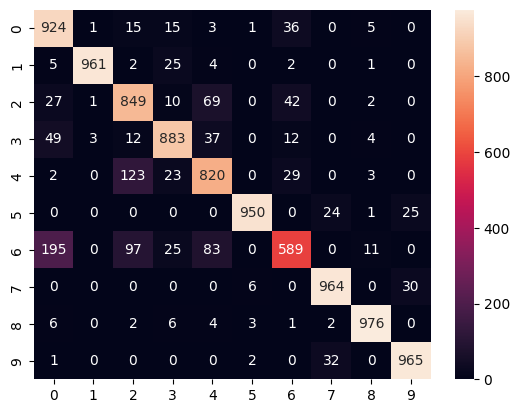

In [99]:
sns.heatmap(cm, annot=True, fmt='d')
plt.show()